In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def model_linear(x,w): # Model
    y = w[1]*x + w[0] # Linear predictor
    return y

def loss_MSE(y,t):
    N = np.shape(y)[0] # number of samples
    loss = np.sum(np.square(t-y)) / N
    return loss

def grad_MSE_linear(x,y,t):
    x1 = np.vstack((np.ones_like(x), x))
    e = (t.flatten() - y)
    N = np.shape(x)[0] # number of samples
    
    grad = - 1.0/N * x1.dot(e)
    return grad

5.932696339945208


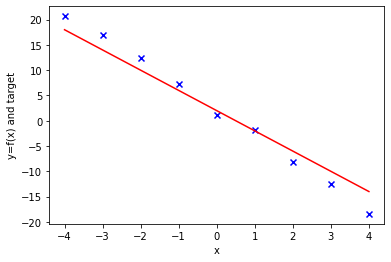

In [2]:
# COOK UP DATA
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]) # Inputs
w_ideal = np.array([2.0, -5.0]) # Actual bias and weight
t = w_ideal[1]*x + w_ideal[0] + 0.9*np.random.randn(np.size(x)) # Adding some noise to desired output

# TRY THE IDEAL WEIGHTS AND PLOT DATA
w = [2.0, -4.0] # Some estimated weights.
y = model_linear(x,w) # Model

# Plot data
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")

# CHECK THE LOSS WITH IDEAL WEIGHTS. IT SHOULD BE LOW, IF THE NOISE IS LOW.
loss = loss_MSE(y,t)
print(loss)

797.1001372009621


Text(0, 0.5, 'y=f(x) and target')

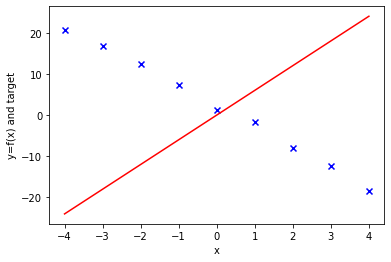

In [3]:
# INITIALIZE SOME WEIGHTS AND TRAINING HYPERPARAMETERS

w = np.array([0.0, 6.0]) # RANDOM INITIALIZATION OF WEIGHTS
learning_rate = 0.05 # HOW FAST WILL THE LEARNING CONVERGE
iterations = 0 # SET ITERATION COUNTER

# CHECK PLOT AND LOSS
y = model_linear(x,w) # Model 

loss = loss_MSE(y,t)
print(loss)

plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")

[0.0978785  2.36499043]


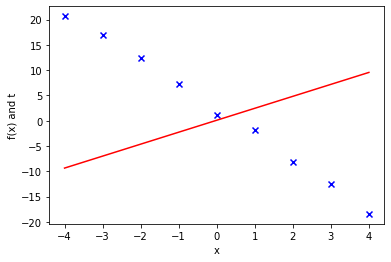

In [4]:
# PERFORM ONE ITERATION OF GRADIENT DESCENT USING MSE LOSS

iterations += 1 # Update iteration number

grad = grad_MSE_linear(x,y,t) # Compute gradient
delta_w = -learning_rate * grad # Update weight and bias
w += delta_w # Update weight and bias

# Plot data
y = model_linear(x,w) # Compute current output
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("f(x) and t")

print(w)

[2, array([ 0.19086308, -0.05834928]), 160.1936462389832]
[3, array([ 0.27919843, -1.67390909]), 72.88820757123008]
[4, array([ 0.36311702, -2.75094896]), 33.94639389748567]
[5, array([ 0.44283967, -3.46897554]), 16.51311582311037]
[6, array([ 0.51857619, -3.94765993]), 8.651452923732878]
[7, array([ 0.59052589, -4.26678285]), 5.054911296043011]
[8, array([ 0.6588781 , -4.47953147]), 3.3639698721632714]
[9, array([ 0.7238127 , -4.62136388]), 2.528978523827524]
[10, array([ 0.78550057, -4.71591882]), 2.0825469593837216]
[11, array([ 0.84410404, -4.77895545]), 1.8161527513306146]
[12, array([ 0.89977734, -4.82097987]), 1.63640321361043]
[13, array([ 0.95266698, -4.84899615]), 1.501144249172517]
[14, array([ 1.00291214, -4.86767367]), 1.3910574752582134]
[15, array([ 1.05064503, -4.88012534]), 1.2970305802409585]
[16, array([ 1.09599129, -4.88842646]), 1.2145386045725124]
[17, array([ 1.13907023, -4.89396054]), 1.1411417285693501]
[18, array([ 1.17999522, -4.89764993]), 1.0753686622154348

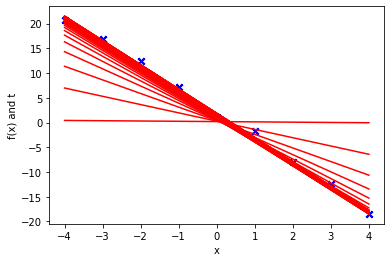

In [5]:
# Perform gradient descent in a loop

max_iter = 100 # Maximum iterations allowed
min_abs_change = 0.005 # Minimum change in weights allowed

while True:
    
    iterations += 1 # Update iteration number

    grad = grad_MSE_linear(x,y,t) # Compute gradient
    delta_w = -learning_rate * grad # Update weight and bias

    # Stopping Condition
    if np.sum(abs(delta_w)) < min_abs_change:
        break
    if iterations > max_iter:
        break

    w += delta_w # update weights

    # Plot data
    y = model_linear(x,w) # Compute current output
    plt.scatter(x, t, c="b", marker='x')
    plt.plot(x, y, c="r")
    plt.xlabel("x")
    plt.ylabel("f(x) and t")

    print([iterations,w,loss_MSE(y,t)])

In [6]:
import numpy as np

def model_logistic(x,w): # Model
    y = w[1]*x + w[0] # Linear predictor
    y = 1 / (1 + np.exp(-y)) # logistic
    return y

def loss_CE(y,t):    
    N = np.shape(y)[0] # number of samples    
    loss = - np.sum( t * np.log(y) + (1-t) * np.log(1-y) ) / N # Cross entropy
    return loss

def grad_CE_logistic(x,y,t):
    x1 = np.vstack((np.ones_like(x), x))
    N = np.shape(y)[0] # number of samples        
    grad = (1.0/len(x)) * np.dot( x1 , y - t ) / N # Gradient of cross entropy
    return grad

0.13246135346109464


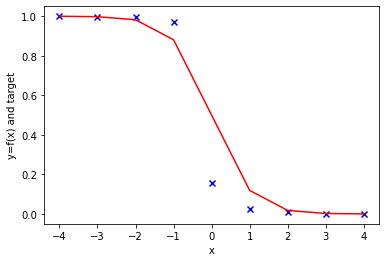

In [7]:
x = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4]) # Inputs
w_ideal = np.array([0, -2.0]) # Actual bias and weight
t = w_ideal[1]*x + w_ideal[0] + 2*np.random.randn(np.size(x)) # Adding some noise to desired output
t = 1 / (1 + np.exp(-t))

# TRY THE IDEAL WEIGHTS AND PLOT DATA
w = w_ideal # Some estimated weights.
y = model_logistic(x,w) # Model

# Plot data
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")


# CHECK THE LOSS WITH IDEAL WEIGHTS. IT SHOULD BE LOW, IF THE NOISE IS LOW.
loss = loss_CE(y,t)
print(loss)

13.34315885887365


Text(0, 0.5, 'y=f(x) and target')

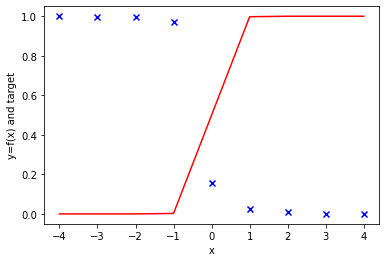

In [8]:
# INITIALIZE SOME WEIGHTS AND TRAINING HYPERPARAMETERS

w = np.array([0.0, 6.0]) # RANDOM INITIALIZATION OF WEIGHTS
learning_rate = 3 # HOW FAST WILL THE LEARNING CONVERGE
iterations = 0 # SET ITERATION COUNTER

# CHECK PLOT AND LOSS
y = model_logistic(x,w) # Model 

loss = loss_CE(y,t)
print(loss)

plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("y=f(x) and target")

[-0.01263384  5.26320679]


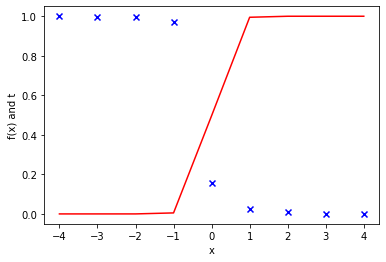

In [9]:
# PERFORM ONE ITERATION OF GRADIENT DESCENT USING MSE LOSS

iterations += 1 # Update iteration number

grad = grad_CE_logistic(x,y,t) # Compute gradient
delta_w = -learning_rate * grad # Update weight and bias
w += delta_w # Update weight and bias

# Plot data
y = model_logistic(x,w) # Compute current output
plt.scatter(x, t, c="b", marker='x')
plt.plot(x, y, c="r")
plt.xlabel("x")
plt.ylabel("f(x) and t")

print(w)

[2, array([-0.02514587,  4.52661518]), 10.086527633589903]
[3, array([-0.03752695,  3.79044847]), 8.461119332931927]
[4, array([-0.04975185,  3.05518654]), 6.840734361266936]
[5, array([-0.06175817,  2.32189899]), 5.231479151877002]
[6, array([-0.07340016,  1.59319962]), 3.649234675099171]
[7, array([-0.08432968,  0.87700939]), 2.1480464375355615]
[8, array([-0.09353334,  0.20733677]), 0.9537516290616878]
[9, array([-0.09889194, -0.26964583]), 0.45248836030513684]
[10, array([-0.1041627 , -0.49646948]), 0.3291107547191208]
[11, array([-0.11051993, -0.63777434]), 0.27727470170507434]
[12, array([-0.11741575, -0.7423167 ]), 0.24770316183079263]
[13, array([-0.12458471, -0.82624363]), 0.2281459317739077]
[14, array([-0.13189242, -0.89686016]), 0.21404365572160025]
[15, array([-0.13926333, -0.95811232]), 0.20328115931167268]
[16, array([-0.14665159, -1.01238477]), 0.1947314628306661]
[17, array([-0.15402777, -1.06123457]), 0.1877339354298307]
[18, array([-0.16137229, -1.1057377 ]), 0.18187

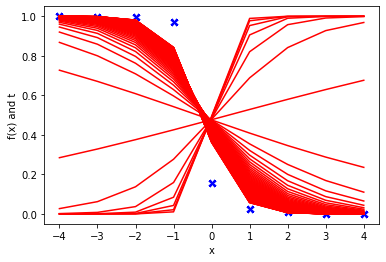

In [10]:
# Perform gradient descent in a loop

max_iter = 100 # Maximum iterations allowed
min_abs_change = 0.005 # Minimum change in weights allowed

while True:
    
    iterations += 1 # Update iteration number

    grad = grad_CE_logistic(x,y,t) # Compute gradient
    delta_w = -learning_rate * grad # Update weight and bias

    # Stopping Condition
    if np.sum(abs(delta_w)) < min_abs_change:
        break
    if iterations > max_iter:
        break

    w += delta_w # update weights

    # Plot data
    y = model_logistic(x,w) # Compute current output
    plt.scatter(x, t, c="b", marker='x')
    plt.plot(x, y, c="r")
    plt.xlabel("x")
    plt.ylabel("f(x) and t")

    print([iterations,w,loss_CE(y,t)])